In [37]:
## importing essential Libraries

import os
import pandas as pd 
import numpy as np
import sys
import seaborn as sb
import tensorflow as tf 
from tensorflow.keras import layers, models, backend
import matplotlib.pyplot as plt

## batch specification
batch_size = 50
img_height = 300
img_width = 300


## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'Rice Leaf Diseases Dataset/rice leaf diseases dataset/rice leaf diseases dataset',
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

## loading testing data
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
'Rice Leaf Diseases Dataset/rice leaf diseases dataset/rice leaf diseases dataset',
    validation_split=0.2,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

class_names = training_ds.class_names

Found 5703 files belonging to 5 classes.
Using 4563 files for training.
Found 5703 files belonging to 5 classes.
Using 1140 files for validation.


In [38]:
class_names

['Bacterialblight', 'Brownspot', 'Healthy', 'Leafsmut', 'Unhealthy Seads']

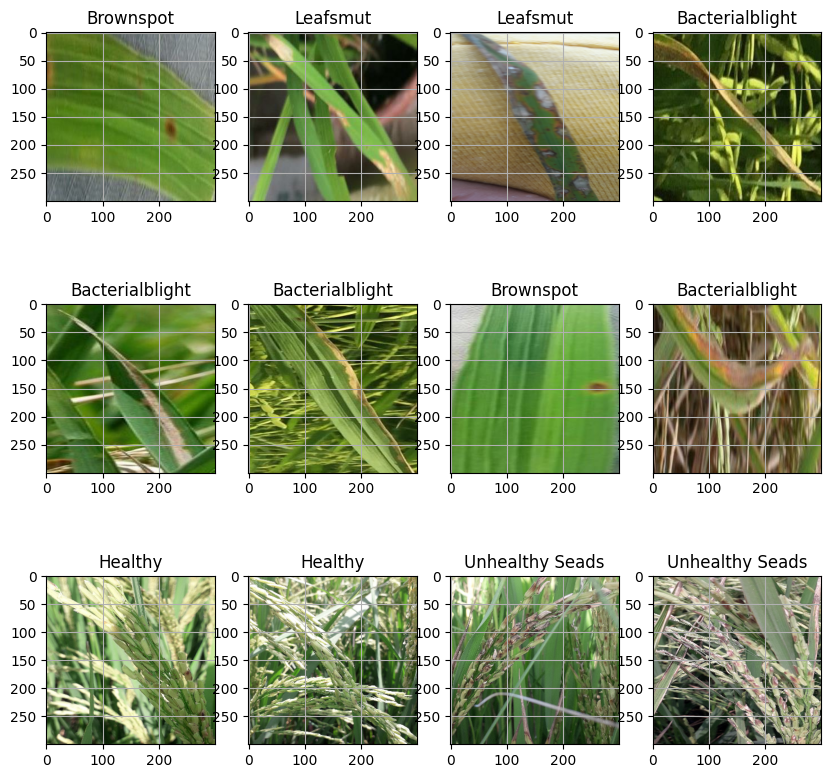

In [39]:
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.grid(True)

In [40]:
model = models.Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)),
layers.Conv2D(20, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(20, 3, activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(16, activation='relu'),
layers.Dense(16, activation='relu'),
layers.Dense(len(class_names), activation='softmax')
])

In [41]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False, reduction=tf.keras.losses.Reduction.NONE),
metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 298, 298, 20)      560       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 149, 20)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 147, 147, 20)      3620      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 73, 20)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 106580)           

In [50]:
epochs = 10
history = model.fit(
training_ds,
validation_data=testing_ds,
epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 21s 205ms/step - loss: 0.0235 - accuracy: 0.9930 - val_loss: 0.3992 - val_accuracy: 0.8974
Epoch 2/10
92/92 [==============================] - 20s 206ms/step - loss: 0.0165 - accuracy: 0.9954 - val_loss: 0.4210 - val_accuracy: 0.8982
Epoch 3/10
92/92 [==============================] - 20s 207ms/step - loss: 0.0323 - accuracy: 0.9912 - val_loss: 0.6181 - val_accuracy: 0.8632
Epoch 4/10
92/92 [==============================] - 20s 208ms/step - loss: 0.1649 - accuracy: 0.9452 - val_loss: 0.5793 - val_accuracy: 0.8702
Epoch 5/10
92/92 [==============================] - 20s 208ms/step - loss: 0.0867 - accuracy: 0.9711 - val_loss: 0.5717 - val_accuracy: 0.8860
Epoch 6/10
92/92 [==============================] - 20s 206ms/step - loss: 0.0274 - accuracy: 0.9925 - val_loss: 0.5549 - val_accuracy: 0.8921
Epoch 7/10
92/92 [==============================] - 20s 206ms/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.5688 - val_accuracy: 0.8921

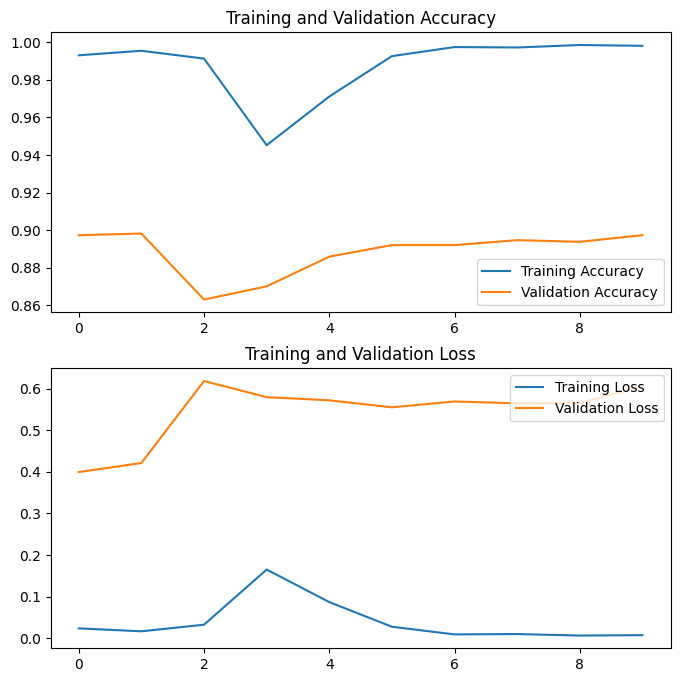

Maximum Validation Accuracy: 0.898245632648468


In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Display the maximum validation accuracy
print("Maximum Validation Accuracy:", max(val_acc))

2/2 [==============================] - 0s 200ms/step


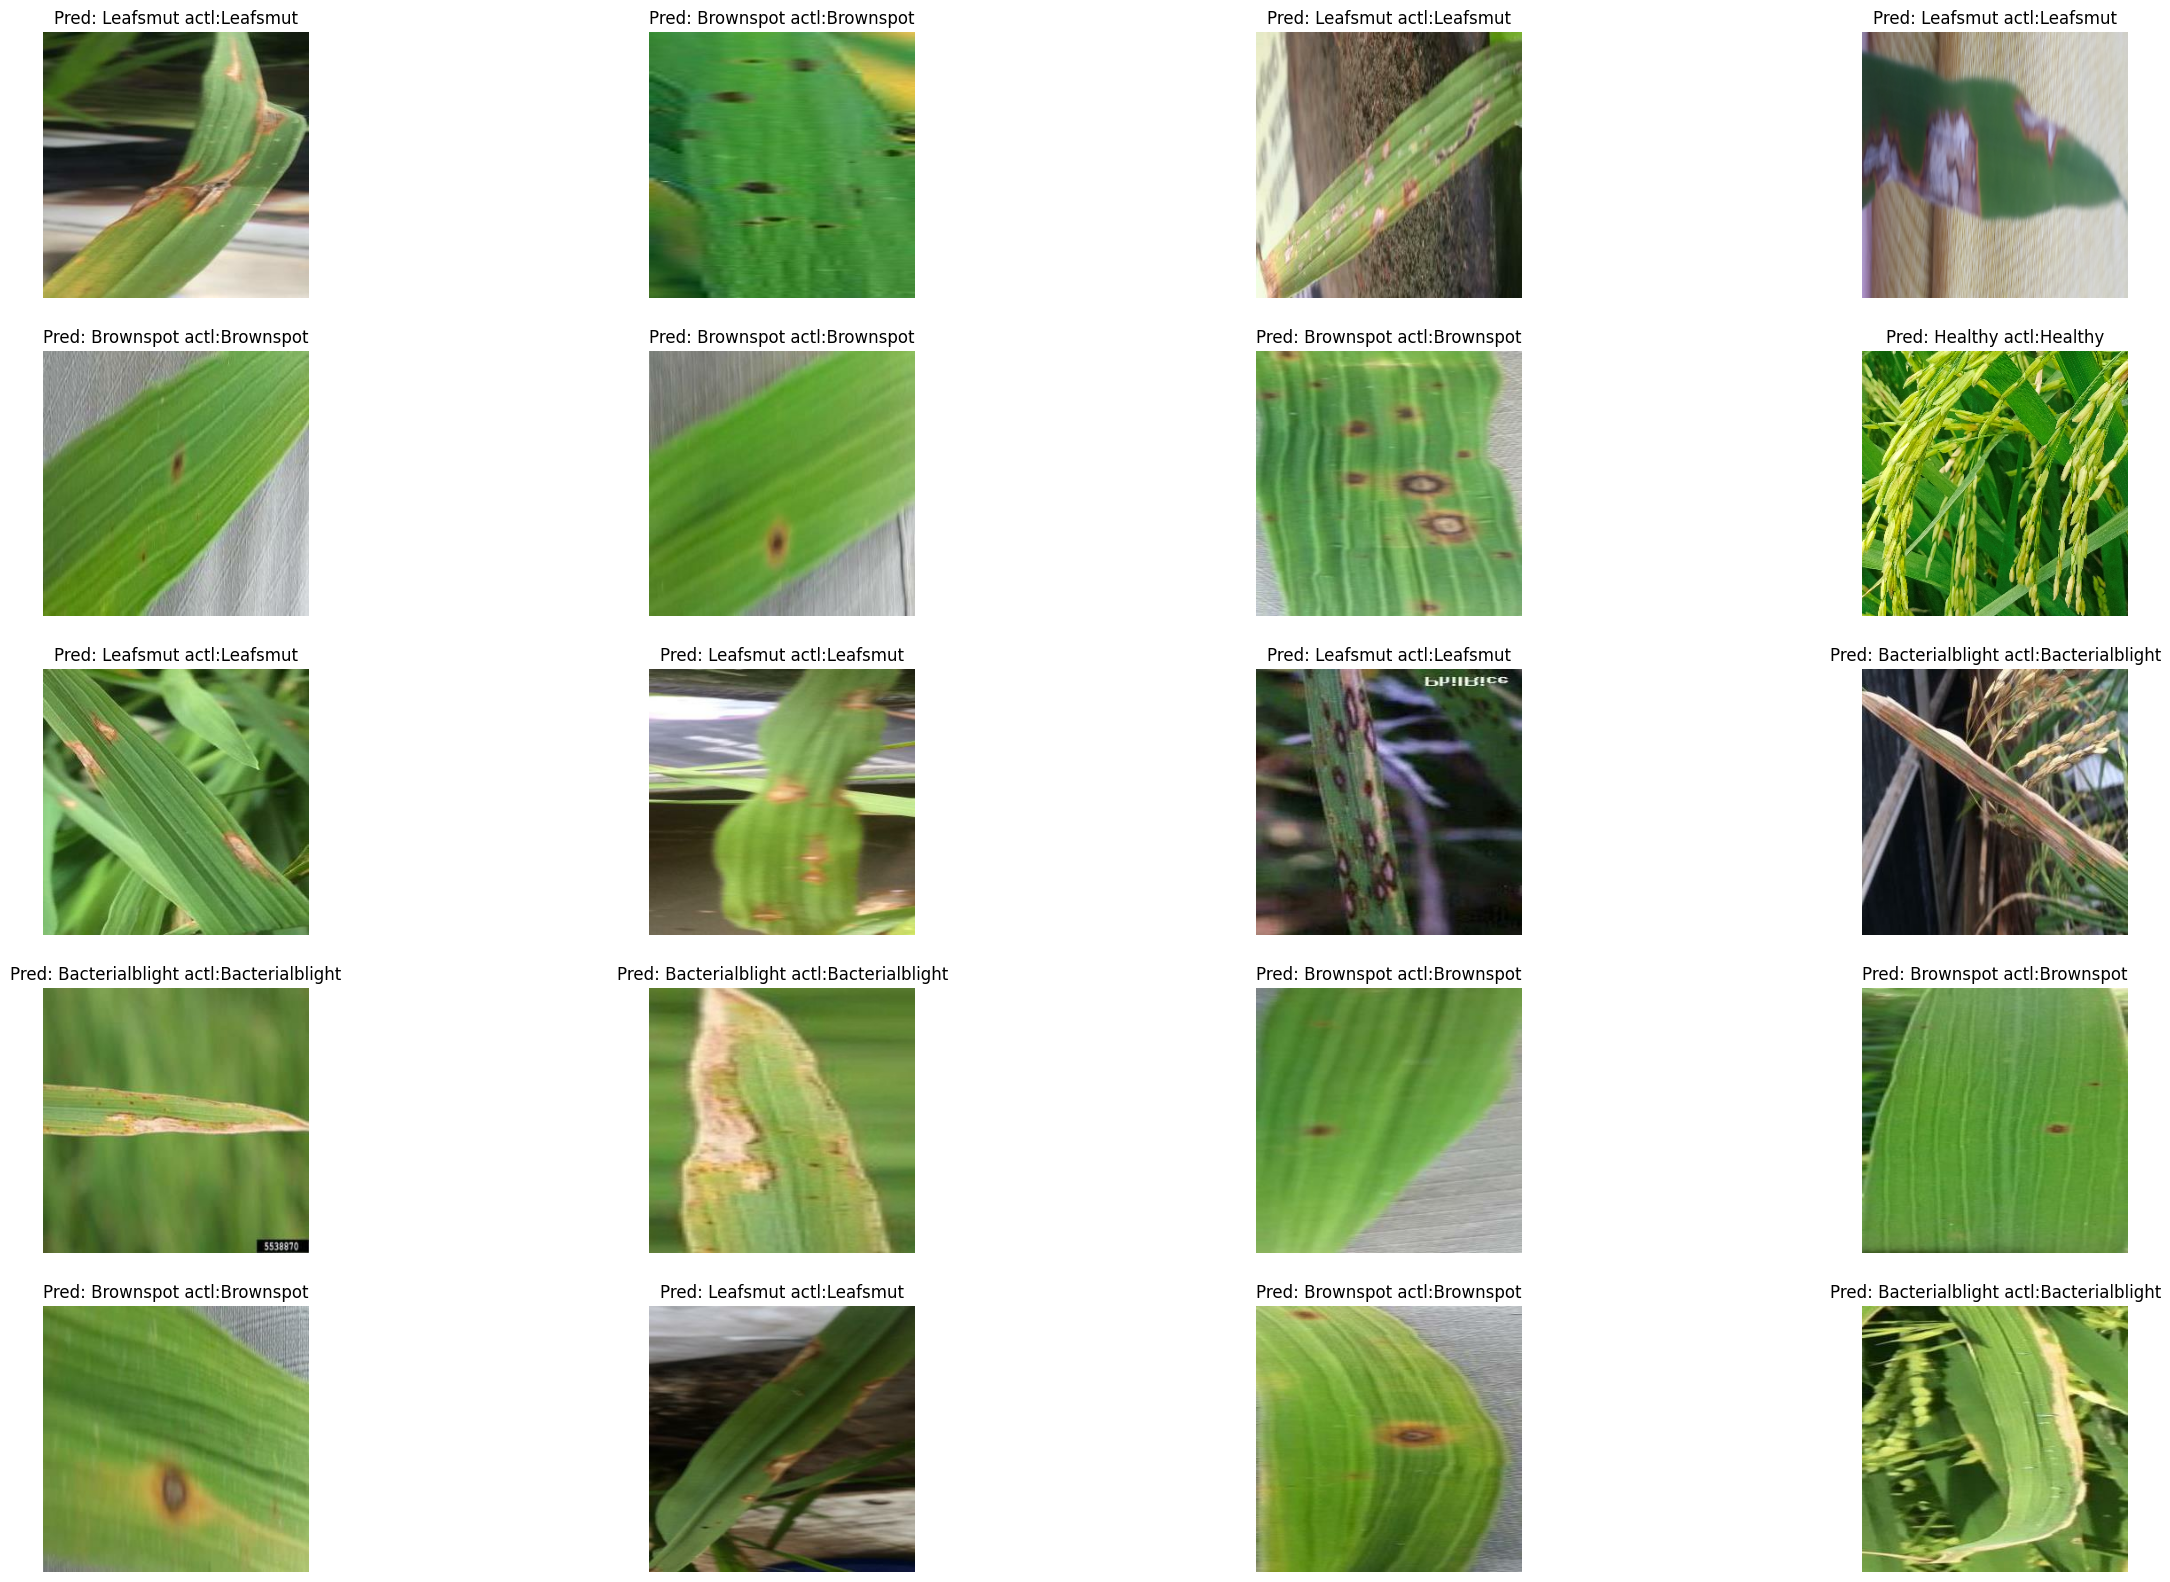

In [52]:
AccuracyVector = []
plt.figure(figsize=(30, 20))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(20):
        ax = plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [46]:
#model.save('./frontend/riceplantdetectionmodel.h5',include_optimizer=True)
model.save('riceplantdetectionmodel.h5',include_optimizer=True)

In [47]:
from tensorflow.keras.preprocessing import image
file_path='Rice Seed Dataset/Unhealthy_Images/unhealthy (45).jpg'
img = image.load_img(file_path, target_size=(300,300))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0 
pred=model.predict(img_array)[0]
np.argmax(pred)

1/1 [==============================] - 0s 31ms/step


3

In [48]:
for i in range(10,50):
    image_path='Rice Seed Dataset/Unhealthy_Images/unhealthy ({}).jpg'.format(i)
    img = image.load_img(image_path, target_size=(300, 300))  # Set the target size as needed

# Convert the image to a numpy array
    img_array = image.img_to_array(img)

# Expand the dimensions to create a batch of size 1
    img_array = tf.expand_dims(img_array, 0)

    pred=model.predict(img_array)[0]
    print(class_names[int (round(np.argmax(pred)))])


1/1 [==============================] - 0s 31ms/step
Unhealthy Seads
1/1 [==============================] - 0s 28ms/step
Unhealthy Seads
1/1 [==============================] - 0s 25ms/step
Unhealthy Seads
1/1 [==============================] - 0s 12ms/step
Unhealthy Seads
1/1 [==============================] - 0s 39ms/step
Unhealthy Seads
1/1 [==============================] - 0s 26ms/step
Unhealthy Seads
1/1 [==============================] - 0s 52ms/step
Unhealthy Seads
1/1 [==============================] - 0s 44ms/step
Unhealthy Seads
1/1 [==============================] - 0s 48ms/step
Unhealthy Seads
1/1 [==============================] - 0s 39ms/step
Unhealthy Seads
1/1 [==============================] - 0s 38ms/step
Unhealthy Seads
1/1 [==============================] - 0s 31ms/step
Unhealthy Seads
1/1 [==============================] - 0s 45ms/step
Unhealthy Seads
1/1 [==============================] - 0s 33ms/step
Unhealthy Seads
1/1 [==============================] - 0s 31ms/s